<a href="https://colab.research.google.com/github/rmiller6stevens/CS518/blob/main/quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.

In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5a3215f5f16987a936b401c98fd3f24a09bd2a737d608cd6aaf61af950ab6650
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.1 MB/s eta 0:00:00


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator

In [ ]:
QiskitRuntimeService.save_account(
channel="ibm_quantum",
token="a0d10f96d7752b38ca8d66e2f5499ffbeed91b496ce923e52d8822c4ccfdecd319db66dcf84e5361db427e15627cfeb3ae7f5861844fbd03dcc5744c2ac38d8c",
set_as_default=True,
overwrite=True,
)

In [ ]:
service = QiskitRuntimeService()

      ┌───┐      ░                     ░ ┌───┐           ░ ┌───┐        ┌─┐┌─┐»
q4_0: ┤ H ├──■───░─────────────────────░─┤ Z ├───────────░─┤ Z ├────────┤M├┤M├»
      └───┘┌─┴─┐ ░      ┌───┐   ┌─┐    ░ └───┘           ░ └───┘        └╥┘└╥┘»
q4_1: ─────┤ X ├─░───■──┤ H ├───┤M├────░─────────────────░───────────────╫──╫─»
      ┌───┐└───┘ ░ ┌─┴─┐└───┘┌─┐└╥┘    ░                 ░               ║  ║ »
q4_2: ┤ H ├──■───░─┤ X ├─────┤M├─╫─────░───■─────────────░───────────────╫──╫─»
      └───┘┌─┴─┐ ░ └───┘     └╥┘ ║     ░ ┌─┴─┐     ┌───┐ ░  ┌─┐          ║  ║ »
q4_3: ─────┤ X ├─░────────────╫──╫─────░─┤ X ├──■──┤ H ├─░──┤M├──────────╫──╫─»
      ┌───┐└───┘ ░            ║  ║     ░ ├───┤┌─┴─┐└───┘ ░  └╥┘ ┌─┐      ║  ║ »
q4_4: ┤ H ├──■───░────────────╫──╫─────░─┤ Z ├┤ X ├──────░───╫──┤M├──■───╫──╫─»
      └───┘┌─┴─┐ ░      ┌───┐ ║  ║ ┌─┐ ░ └───┘└───┘      ░   ║  └╥┘  │   ║  ║ »
q4_5: ─────┤ X ├─░───■──┤ H ├─╫──╫─┤M├─░─────────────────░───╫───╫───┼───╫──╫─»
      ┌───┐└───┘ ░ ┌─┴─┐└┬─┬┘ ║  ║ └╥┘ ░

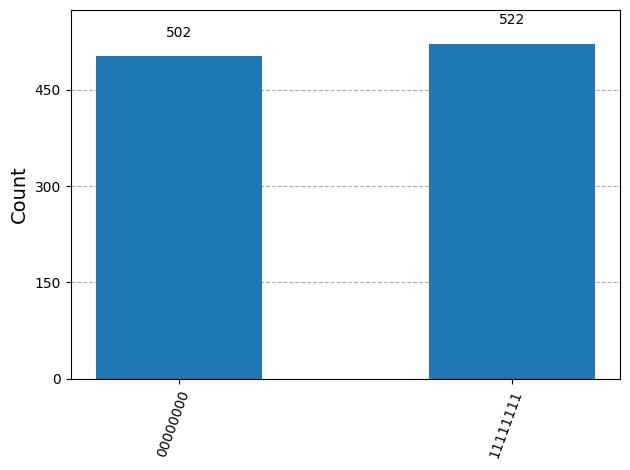

In [ ]:
#Robert Miller
q = QuantumRegister(8)
c = ClassicalRegister(8)
############
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.h(q[2])
circuit.h(q[4])
circuit.h(q[6])
circuit.cx(q[0],q[1])
circuit.cx(q[2],q[3])
circuit.cx(q[4],q[5])
circuit.cx(q[6],q[7])
circuit.barrier()
#Condense Repeaters
circuit.cx(q[1],q[2])
circuit.h(q[1])
circuit.cx(q[5],q[6])
circuit.h(q[5])
circuit.measure(q[1], c[0])
circuit.measure(q[2], c[1])
circuit.measure(q[5], c[2])
circuit.measure(q[6], c[3])
#For clarity
circuit.barrier()
circuit.z(q[0])
circuit.z(q[4])
circuit.cx(q[2],q[3])
circuit.cx(q[6],q[7])
circuit.cx(q[3],q[4])
circuit.h(q[3])
circuit.barrier()
circuit.measure(q[3], c[4])
circuit.measure(q[4], c[5])
circuit.z(q[0])
circuit.cx(q[4],q[7])
# circuit.measure_all()
circuit.measure(q[0],c)
circuit.measure(q[7],c)
print(circuit)
# backend = AerSimulator.get_backend('qasm_simulator')
result = AerSimulator().run(circuit).result()
# # print(result)
plot_histogram(result.get_counts())

In [ ]:
# # Creating a Quantum circuit
# q = QuantumRegister(1)
# c = ClassicalRegister(1)
# circuit = QuantumCircuit(q,c)
# circuit.x(q[0])
# # circuit.x(q[0])
# circuit.measure(q,c)
# print(circuit)
# result = AerSimulator().run(circuit).result()
# counts = result.get_counts()
# print(counts)

# circuit.x(q[0])
# circuit.measure(q,c)
# print(circuit)
# result = AerSimulator().run(circuit).result()
# counts = result.get_counts()
# print(counts)